In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [14]:
df = pd.read_csv('data.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [15]:
q1 = 2223.750000
q3 = 3608.000000
lower_bound = q1 - 1.5*(q3-q1)
upp_bou = q3+1.5*(q3-q1)
print(lower_bound)
print(upp_bou)

147.375
5684.375


In [16]:
len(df['mpg'].unique())


129

In [17]:
df.drop(['acceleration','model_year','origin','name'],axis=1,inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449
...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790
394,44.0,4,97.0,52.0,2130
395,32.0,4,135.0,84.0,2295
396,28.0,4,120.0,79.0,2625


In [18]:
df.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [19]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
dtype: int64

In [20]:
mean = df['horsepower'].mean()
df['horsepower'].fillna(mean,inplace=True)

In [21]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
dtype: int64

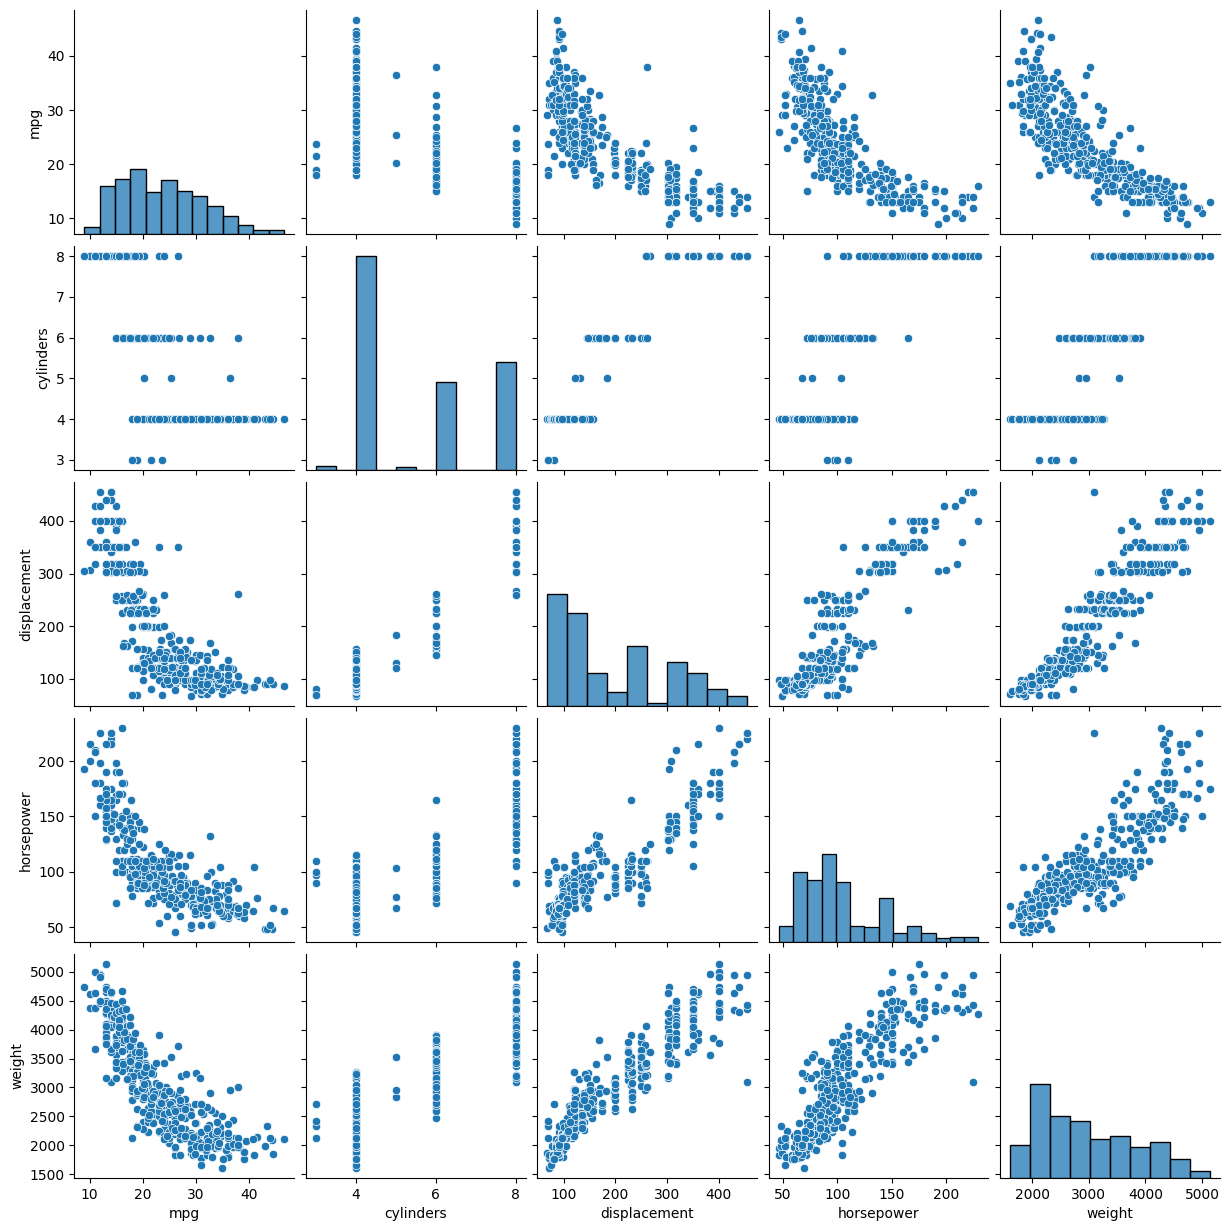

In [22]:
sns.pairplot(df)

In [23]:
df.corr()

,mpg,cylinders,displacement,horsepower,weight
mpg,1.000000,-0.775396,-0.804203,-0.771437,-0.831741
cylinders,-0.775396,1.000000,0.950721,0.838939,0.896017
displacement,-0.804203,0.950721,1.000000,0.893646,0.932824
horsepower,-0.771437,0.838939,0.893646,1.000000,0.860574
weight,-0.831741,0.896017,0.932824,0.860574,1.000000


<Axes: >

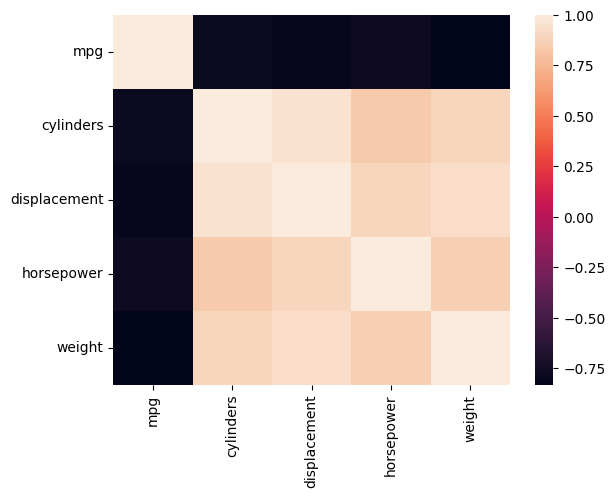

In [24]:
sns.heatmap(df.corr())

In [25]:
X = df[['cylinders','displacement','horsepower','weight']]
y = df['mpg']

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    'svr':SVR()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) 


    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print('r2_score : ',r2_score(y_train,y_train_pred))
    print('mean_absolute_error : ',mean_absolute_error(y_train,y_train_pred))
    print('mean_squared_error : ',mean_squared_error(y_train,y_train_pred))
    print('-'*35)
    print('Model performance for testing set')
    print('r2_score : ',r2_score(y_test,y_test_pred))
    print('mean_absolute_error : ',mean_absolute_error(y_test,y_test_pred))
    print('mean_squared_error : ',mean_squared_error(y_test,y_test_pred))
    print('='*35)
    

Linear Regression
Model performance for Training set
r2_score :  0.7147763215167164
mean_absolute_error :  3.372429862832864
mean_squared_error :  18.82245119107592
-----------------------------------
Model performance for testing set
r2_score :  0.6563086437888328
mean_absolute_error :  2.9309006426346866
mean_squared_error :  15.69106767657478
Lasso
Model performance for Training set
r2_score :  0.698246947191262
mean_absolute_error :  3.4303618644332268
mean_squared_error :  19.913255934617307
-----------------------------------
Model performance for testing set
r2_score :  0.6518897385218847
mean_absolute_error :  2.8930584866397364
mean_squared_error :  15.892810724070722
Ridge
Model performance for Training set
r2_score :  0.7147468029389121
mean_absolute_error :  3.3727377466584136
mean_squared_error :  18.82439917797836
-----------------------------------
Model performance for testing set
r2_score :  0.6559778449445213
mean_absolute_error :  2.9288131019620964
mean_squared_erro

In [29]:
K_model = KNeighborsRegressor()
params = {
    'n_neighbors':[5,7,1,4,10,14],
    'weights':['uniform', 'distance'],
    'leaf_size':[25,30,35,40],
    
}

In [30]:
from sklearn.model_selection import RandomizedSearchCV
r_model = RandomizedSearchCV(estimator=K_model,param_distributions=params,n_jobs=-1)
r_model.fit(X_train,y_train)

,estimator,KNeighborsRegressor()
,param_distributions,"{'leaf_size': [25, 30, ...], 'n_neighbors': [5, 7, ...], 'weights': ['uniform', 'distance']}"
,n_iter,10
,scoring,None
,n_jobs,-1
,refit,True
,cv,None
,verbose,0
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [31]:
y_p = r_model.predict(X_test)
r2_score(y_test,y_p)

0.6076180842176657

In [32]:
r_model.best_params_

{'weights': 'distance', 'n_neighbors': 5, 'leaf_size': 40}

In [33]:
model_f = KNeighborsRegressor(weights='distance',n_neighbors=14,leaf_size=40)
model_f.fit(X_train,y_train)

,n_neighbors,14
,weights,'distance'
,algorithm,'auto'
,leaf_size,40
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [34]:
y_f = model_f.predict(X_test)
r2_score(y_test,y_f)

0.6294619896059995

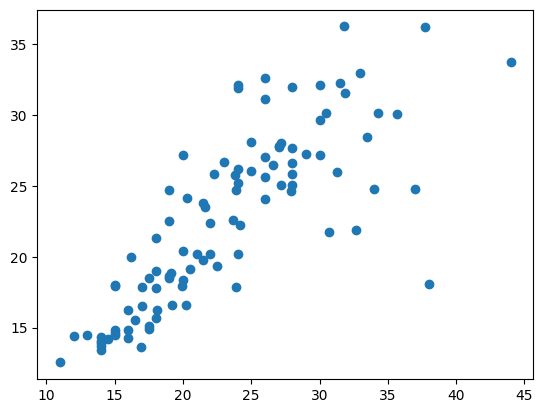

In [35]:
plt.scatter(y_test,y_f)

In [36]:
import streamlit as st 
st.title('ml modle')

2025-11-04 22:51:12.566 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 22:51:12.630 
  command:

    streamlit run /Users/apple/AI_ML/venv/lib/python3.12/site-packages/ipykernel_launcher.py [ARGUMENTS]
2025-11-04 22:51:12.630 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-04 22:51:12.631 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


DeltaGenerator()

In [37]:
df.columns
df.head()

,mpg,cylinders,displacement,horsepower,weight
0,18.0,8,307.0,130.0,3504
1,15.0,8,350.0,165.0,3693
2,18.0,8,318.0,150.0,3436
3,16.0,8,304.0,150.0,3433
4,17.0,8,302.0,140.0,3449


In [38]:
model_f.predict([[8,307,130,3504]])


array([12.14285802])